In [1]:
import pandas as pd
import numpy as np
from IPython.display import display, HTML, clear_output

import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [2]:
df_c = pd.read_csv('input/challenges.csv')
df_s = pd.read_csv('input/submissions.csv', parse_dates=['created_at'])

### Investingating **Challenges** data

2865 challenges, 637 of them are duplicates

In [3]:
df_c.head()

,challenge_id,contest_id,domain,subdomain,difficulty,solved_submission_count,total_submissions_count
0,18e0a2dad5e127d6,c8ff662c97d345d2,Artificial Intelligence,Bot Building,0.978261,319,655
1,0251520ace81bc57,c8ff662c97d345d2,Algorithms,Strings,0.894473,765,1267
2,425f241df843cd89,c8ff662c97d345d2,Algorithms,Strings,0.908853,1247,1864
3,970eca328814a522,c8ff662c97d345d2,Algorithms,Strings,0.902722,453,835
4,46592c29655cfc5e,c8ff662c97d345d2,Algorithms,Strings,0.900000,312,1363


#### challenge_id
There are some duplicated `challenge_ids`. Their amount is significant. The reason is that they were featured in a few different contests. Their difficult is the same, but the number of solved/total submissions is different. I can fill domain and subdomain

In [4]:
print df_c['challenge_id'].duplicated().sum()
df_c['challenge_id'].value_counts().head(3)

637


22948b6ee6a5aea3    7
9b74ae4f84db9cc1    4
95aecaeab7d20366    4
Name: challenge_id, dtype: int64

In [5]:
df_c[df_c['challenge_id'] == 'c6a2b608f6b18852']

,challenge_id,contest_id,domain,subdomain,difficulty,solved_submission_count,total_submissions_count
416,c6a2b608f6b18852,c8ff662c97d345d2,Linux Shell,Text Processing,0.973241,123,132
621,c6a2b608f6b18852,3516cfdae60e360c,NaN,NaN,0.973241,52,54
2135,c6a2b608f6b18852,22a5f23684452bd3,NaN,NaN,0.973241,2,2
2151,c6a2b608f6b18852,04b85091aa5c336b,NaN,NaN,0.973241,4,4


#### contest_id

There are 256 unique contests. Majority have less than 10 challenges. Two outliers:
 - `c8ff662c97d345d2` with 1340. The one we want to select from. Looks like an aggregation of many (all?) domains
 - `5d70c374e6959faf` with 135. No domain. No subdomain
 
Most probably contest_id will be removed.

In [6]:
df_c['contest_id'].nunique()

256

In [7]:
tmp = df_c['contest_id'].value_counts()
tmp.head(2)

c8ff662c97d345d2    1340
5d70c374e6959faf     135
Name: contest_id, dtype: int64

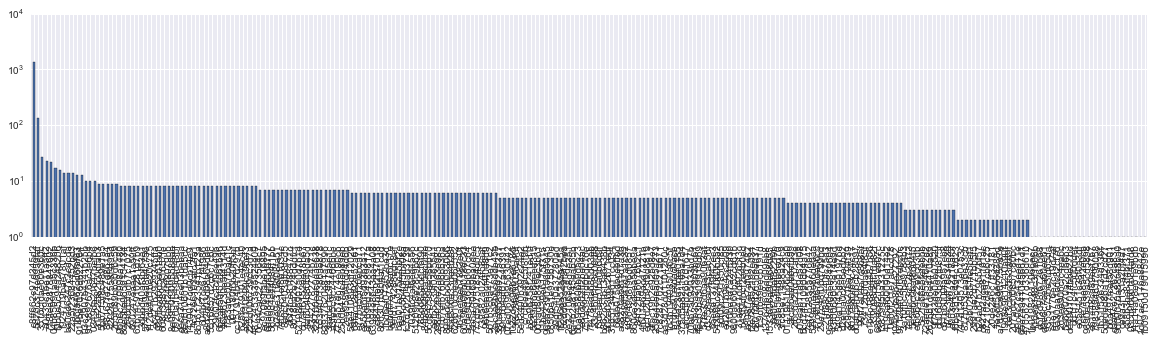

In [8]:
tmp.plot('bar', figsize=(20, 4), logy=True);

#### domain
Half of the domain is null. The most popular has 300 value, the mean has ~60.

Similar for subdomain.

In [9]:
print df_c['domain'].nunique()
print df_c['domain'].unique().tolist()

16
['Artificial Intelligence', 'Algorithms', nan, 'Data Structures', 'C++', 'Mathematics', 'Security', 'Java', 'SQL', 'Python', 'Regex', 'Tutorials', 'Functional Programming', 'Databases', 'Linux Shell', 'Ruby', 'Distributed Systems']


In [10]:
df_c['domain'].isnull().sum() / float(len(df_c))

0.55008726003490405

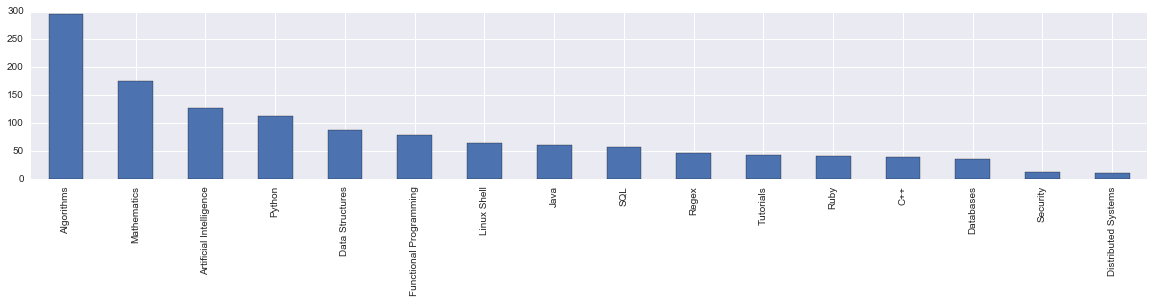

In [11]:
df_c['domain'].value_counts().plot('bar', figsize=(20, 3));

In [12]:
print df_c['subdomain'].nunique()
print df_c['subdomain'].unique().tolist()

97
['Bot Building', 'Strings', 'Dynamic Programming', nan, 'Linked Lists', 'Introduction', 'Fundamentals', 'Implementation', 'Warmup', 'Greedy', 'Sorting', 'Combinatorics', 'Search', 'Graph Theory', 'Functions', 'Basic Select', 'Arrays', 'Basic Data Types', 'Character Class', 'Repetitions', 'Grouping and Capturing', '30 Days of Code', 'Backreferences', 'Game Theory', 'Stacks', 'Queues', 'Heap', 'Classes', 'Advanced Select', 'Aggregation', 'Basic Join', 'Advanced Join', 'Alternative Queries', 'Relational Algebra', 'Database Normalization', 'Bash', 'Inheritance', 'Text Processing', 'Bit Manipulation', 'Trees', 'BigNumber', 'Probability', 'Probability & Statistics - Foundations', 'Natural Language Processing', 'Statistics and Machine Learning', 'Digital Image Analysis', 'Recursion', 'STL', 'Object Oriented Programming', 'Exception Handling', 'Data Structures', 'Advanced', 'Functional Structures', 'Ad Hoc', 'Persistent Structures', 'Memoization and DP', 'Numpy', 'Interpreter and Compilers'

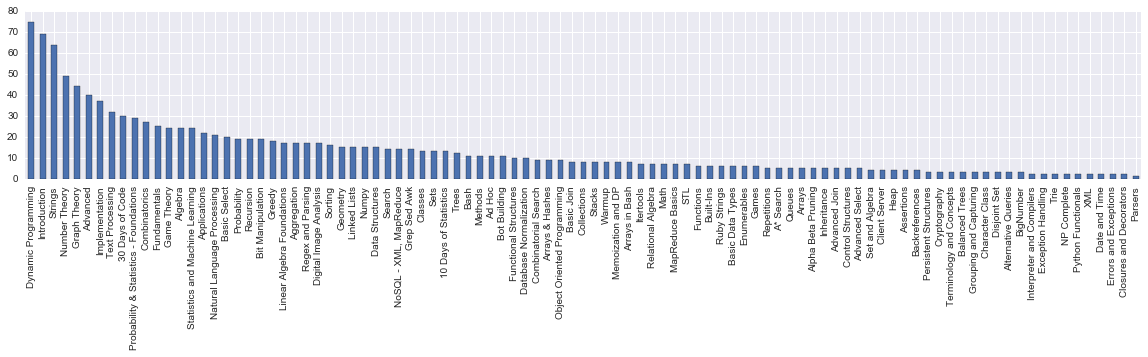

In [13]:
df_c['subdomain'].value_counts().plot('bar', figsize=(20, 3));

#### difficulty

No difficulty higher than 1. It is not evenly distributied and is grouped around some values. There are only few very easy challenges

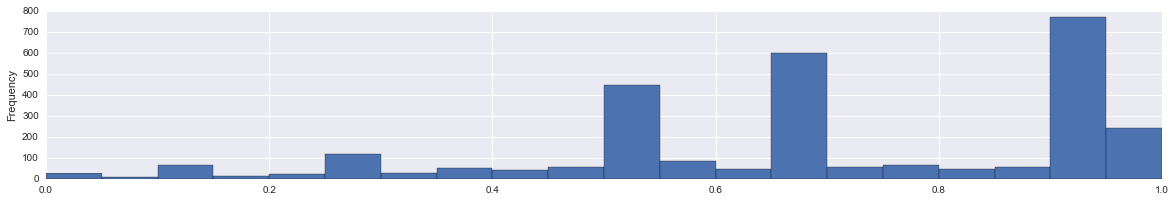

In [14]:
df_c['difficulty'].plot('hist', bins=20, figsize=(20, 3));

#### solved_submission_count and total_submissions_count

Powerlaw distribution. There is a low correlation between probability of success and easiness of the puzzle.

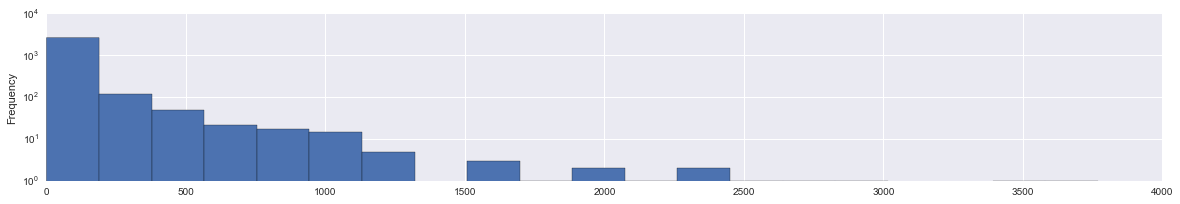

In [15]:
df_c['solved_submission_count'].plot('hist', bins=20, figsize=(20, 3), logy=True);

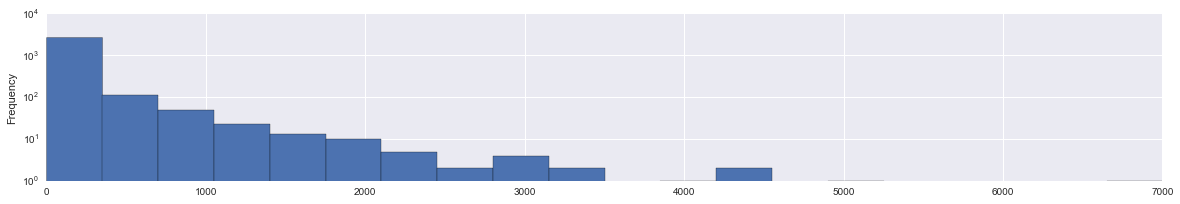

In [16]:
df_c['total_submissions_count'].plot('hist', bins=20, figsize=(20, 3), logy=True);

In [17]:
tmp = df_c['solved_submission_count'] / df_c['total_submissions_count']
tmp.corr(df_c['difficulty'])

0.46186232149151846

### Investigating submissions data

`286064` submissions, 10000 unique hackers. There are `47` languages. Some can be grouped together. Most probably it makes sense to group languages into `algo, AI/ML, scripting, functional`.

In [18]:
df_s.head()

,hacker_id,contest_id,challenge_id,language,solved,created_at
0,56d47667c6a9242e,c8ff662c97d345d2,6d95afeb4d968b91,java,0,2011-08-07 00:36:53
1,56d47667c6a9242e,c8ff662c97d345d2,6d95afeb4d968b91,java,0,2011-08-07 00:38:45
2,56d47667c6a9242e,c8ff662c97d345d2,6d95afeb4d968b91,java,0,2011-08-07 00:43:49
3,56d47667c6a9242e,c8ff662c97d345d2,6d95afeb4d968b91,java,0,2011-08-07 00:52:34
4,56d47667c6a9242e,c8ff662c97d345d2,6d95afeb4d968b91,java,0,2011-08-07 00:56:52


In [19]:
df_s['hacker_id'].value_counts().head()

8bd650faf70187c7    1736
5d0d568694b3a8d4    1304
448f9f09ec3af141    1086
a634fdb6987fc37e     714
ef8361589674b2c5     675
Name: hacker_id, dtype: int64

In [20]:
lang_map = {
    'python3': 'python',
    'pypy3': 'python',
    'pypy': 'python',
    'java8': 'java',
    'mysql': 'sql',
    'oracle': 'sql',
    'tsql': 'sql',
    'db2': 'sql',
    'cpp14': 'cpp',
    'text_pseudo': 'text',
    'sbcl': 'lisp',
    'clisp': 'lisp',
    '["html", "js", "css"]': 'javascript',
    'coffeescript': 'javascript'
}
df_s['language'] = df_s['language'].apply(lambda x: lang_map.get(x, x))